# 아달린 
## 경사하강법 적용
### 미분을 이용해서 손실함수가 최소화 된 가중치 찾기
- 개별 훈련 샘플마다 평가 후 가중치 업데이트가 아닌, 전체 훈련 데이터셋을 기반으로 Gradient 계산

### 1-1. Adaline GD 정의

In [6]:
import numpy as np

class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>= 0.5, 1, 0)

### 1-2. Adaline SGD 정의

In [24]:
class AdalineSGD:
    def __init__(self,eta=0.01, n_iter = 10, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self,X,y):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            losses = []
            for xi, target in zip(X,y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self,X,y):
        r = self.rgen.permutations(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input)
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
        
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>= 0.5, 1, 0)

### 2. 데이터

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


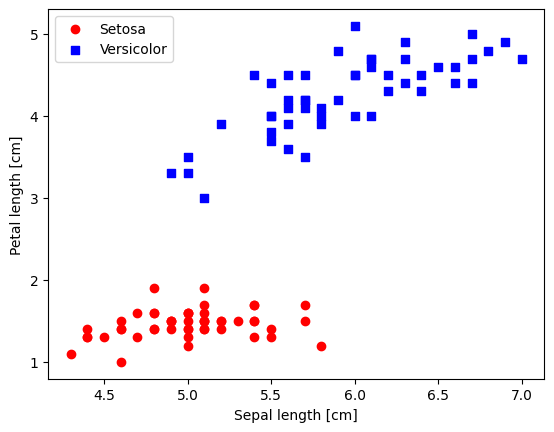

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')



y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50,1], color='red',marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### 2. 실험 및 손실 그래프

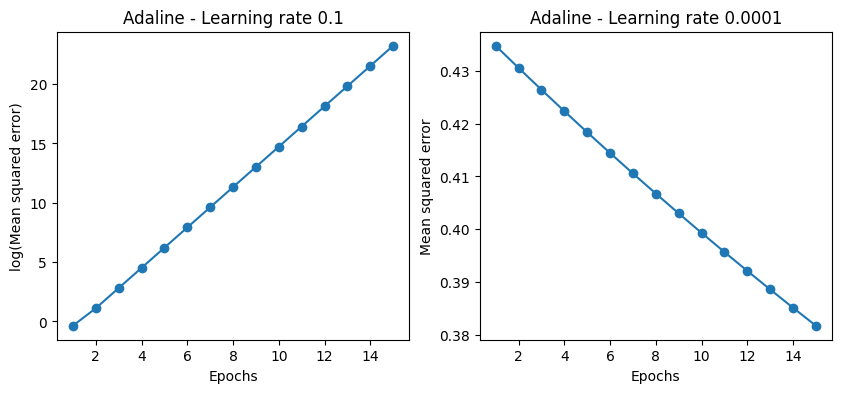

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X,y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()


### 3.표준화

In [10]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:, 0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:, 1].std()

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('o','s','^','v','<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #산점도
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolors='black')

                    

### 3-1 AdlineGD 확인

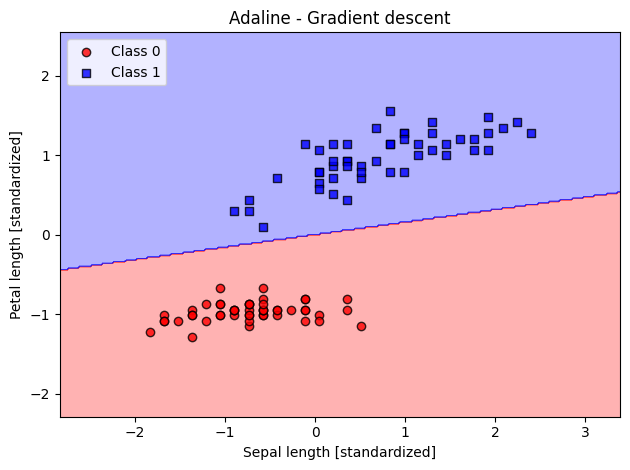

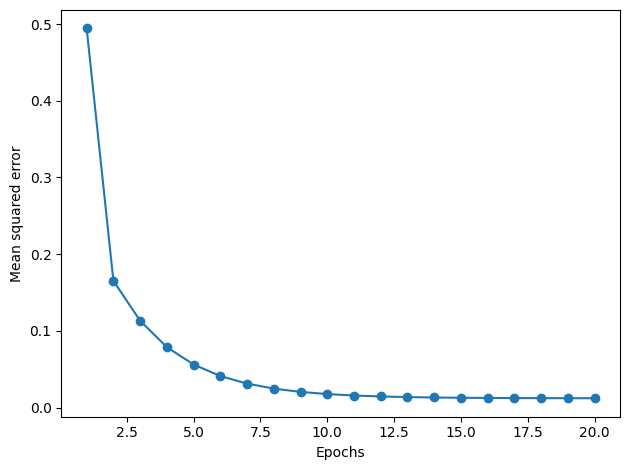

In [12]:
# Adaline 모델 학습
ada_gd = AdalineGD(n_iter=20, eta=0.5).fit(X_std, y)

# 결정 경계 시각화
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 손실 값 플롯
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()


### 3-2. AdlineSGD확인

In [25]:
# Adaline 모델 학습
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

# 결정 경계 시각화
plot_decision_regions(X_std, y, classifier=ada_sgd)  # 올바른 분류기 사용
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 손실 값 시각화
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()


AttributeError: 'numpy.random.mtrand.RandomState' object has no attribute 'permutations'